# Data Import & Preparation

In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
# Load a more complex dataset - Credit Card Fraud Detection
data = fetch_openml(name='creditcard', version=1, as_frame=True)
#https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=creditcard&id=1597

X = data.data  # Features
y = data.target.astype(int)  # Target, converted to integer for compatibility


# Data Analysis , Report & EDA

In [32]:
# Print basic information about the dataset
print("Dataset Information:")
print(X.info())
print("\nDataset Description:")
print(X.describe())

# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())

# Check the distribution of the target variable
print("\nTarget Variable Distribution:")
print(y.value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  fl

The dataset contains 284,807 entries and 29 columns, with no missing values. The features are anonymized (V1 to V28) and include an "Amount" column representing transaction amounts. The target variable is highly imbalanced, with 492 fraudulent transactions (class 1) and 284,315 non-fraudulent transactions (class 0). Let's proceed with exploratory data analysis (EDA).

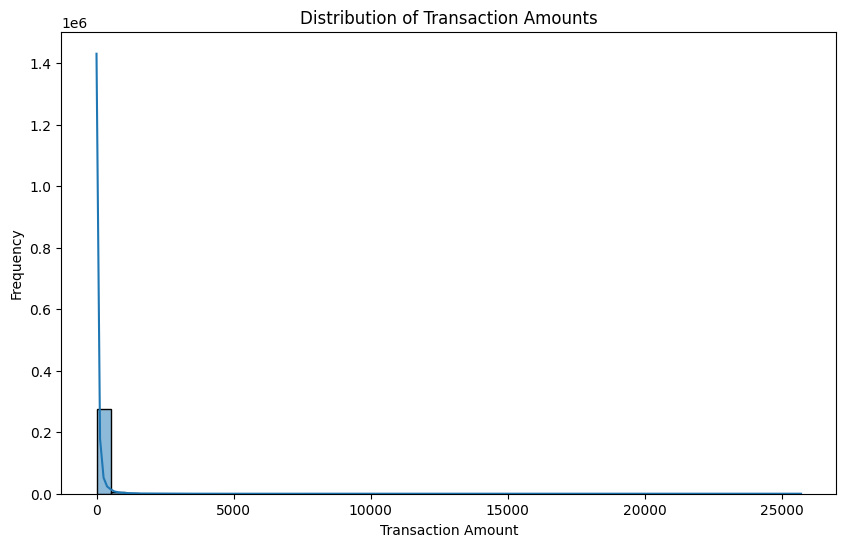

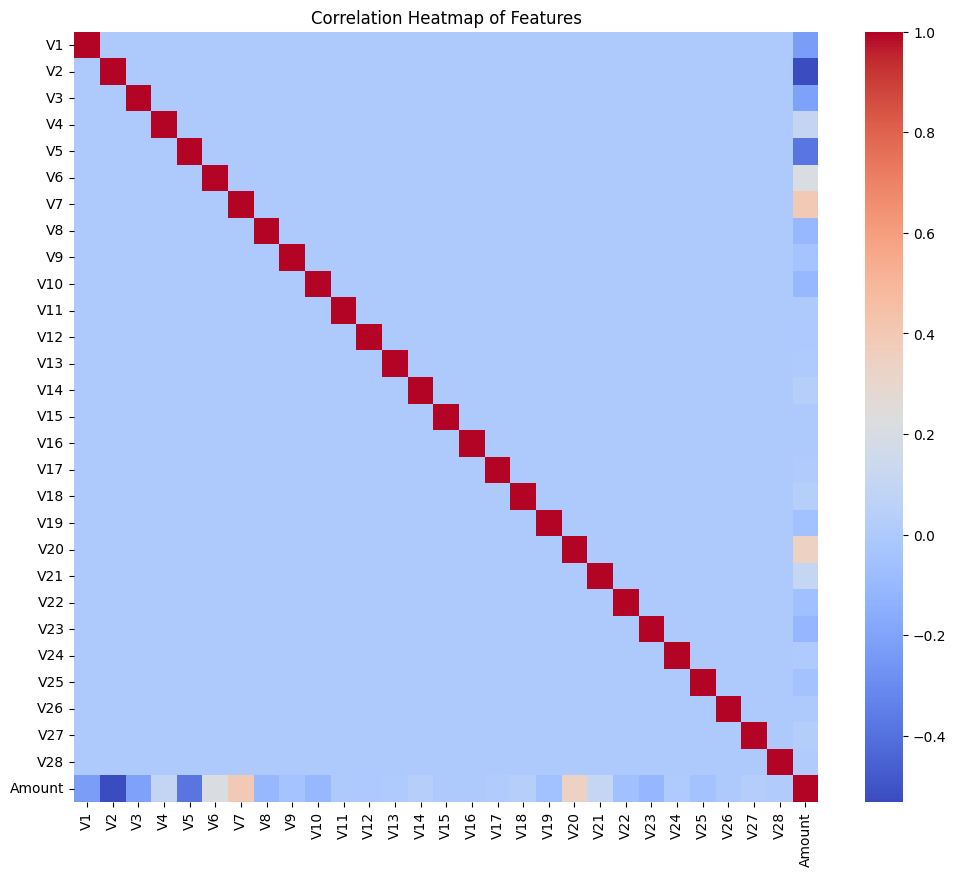

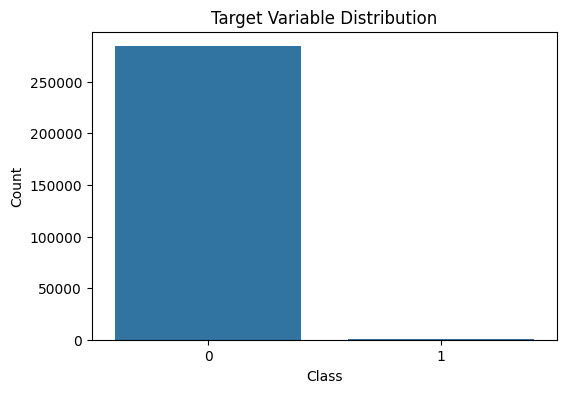

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(X['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

# Plot the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The EDA visualizations include:

1. The distribution of transaction amounts shows a right-skewed pattern, with most transactions having smaller amounts.
2. The correlation heatmap reveals the relationships between features, though most features are weakly correlated due to anonymization.
3. The target variable distribution confirms the dataset's imbalance, with very few fraudulent transactions compared to non-fraudulent ones.

# Feature Engineering & Model Training

In [2]:
# Feature Engineering: Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Transformation: Apply Power Transformation for better normality
transformer = PowerTransformer()
X_transformed = transformer.fit_transform(X_scaled)

In [3]:
# Split data into training and testing sets with stratified sampling to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Save the prepared data for later use
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)
print("Data preparation with feature engineering completed and saved.")

Data preparation with feature engineering completed and saved.


In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import optuna

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Hyperparameter tuning for RandomForestClassifier using GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [20]:
gscv_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,cv=2, verbose=2, n_jobs=-1)
gscv_rf.fit(X_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  33.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  29.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 1.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 1.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  35.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  31.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.1min
[CV] END max_d

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [22]:
best_params_rf = gscv_rf.best_params_
print("Best Parameters for RandomForest from GridSearchCV:", best_params_rf)

Best Parameters for RandomForest from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [28]:
# File 3: train_and_evaluate.py
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load prepared data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Train and evaluate RandomForest model using the best parameters from Optuna
rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("RandomForest Model Accuracy:", rf_accuracy)

# Provide a detailed classification report 
print("RandomForest Classification Report:\n", classification_report(y_test, rf_pred))


RandomForest Model Accuracy: 0.9996313331694814
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.84      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
# Save the better-performing model

joblib.dump(rf_model, 'best_model.pkl')
print("RandomForest model saved as best_model.pkl")


RandomForest model saved as best_model.pkl


In [62]:
import requests
import numpy as np

# Define the API endpoint
url = "http://127.0.0.1:9696/predict"

# Example feature data (replace with actual feature values)
example_features = [-0.8840273411734237,
  1.7822804597528,
  -1.6934743932256737,
  1.5495725621015788,
  -0.9932045660129188,
  -0.7254956645460121,
  -2.479298392851497,
  1.209813994449899,
  -2.2661700485522998,
  -5.28117971890821,
  2.0735085990671527,
  -3.12282392388905,
  0.6607144843420577,
  -4.917824090499457,
  0.6257200002150141,
  -4.333929180751305,
  -6.577996207565781,
  -3.536506148902853,
  2.0769497730863744,
  0.7274025170236523,
  0.8975468709797324,
  0.09308641009425725,
  -0.3671041959569382,
  -0.9026815800521959,
  0.40058091666261214,
  1.4719238541413673,
  1.6353838846258901,
  0.7677944749032589,
  -1.075859376790042]
# Prepare the payload
payload = {
    "features": example_features
}

# Send POST request to the API
response = requests.post(url, json=payload)

# Display the response
if response.status_code == 200:
    print("Prediction Response:", response.json())
else:
    print("Error:", response.status_code, response.text)

Prediction Response: {'prediction': 1}


In [64]:
import pkg_resources

# Get the list of installed packages
installed_packages = pkg_resources.working_set

# Create a requirements.txt content
requirements = "\n".join(["{}=={}".format(pkg.key, pkg.version) for pkg in installed_packages])

# Save to requirements.txt
with open("requirements.txt", "w") as f:
    f.write(requirements)

requirements

'pyzmq==24.0.1\nattrs==22.1.0\npackaging==21.3\nargon2-cffi==21.3.0\nargon2-cffi-bindings==21.2.0\nipython==8.5.0\njupyter-client==7.4.3\nipykernel==6.16.1\nnotebook==6.5.5\nnbconvert==6.4.5\ntornado==6.2\npsutil==5.9.3\nnbformat==5.7.0\ntraitlets==5.5.0\nujson==5.5.0\ndecorator==5.1.1\nbleach==5.0.1\njupyter-core==4.11.2\nbeautifulsoup4==4.11.1\npexpect==4.8.0\nanyio==3.6.2\nidna==3.4\njsonschema==3.2.0\njinja2==3.1.2\nprompt-toolkit==3.0.31\npyparsing==3.0.9\npycparser==2.21\nfastjsonschema==2.16.2\npygments==2.13.0\npython-dateutil==2.8.2\nsql-metadata==2.6.0\nsoupsieve==2.3.2.post1\ncharset-normalizer==2.1.1\nasttokens==2.0.8\nmarkupsafe==2.0.0\njupyter-server==1.21.0\nsix==1.16.0\ncffi==1.15.1\nsend2trash==1.8.0\ndebugpy==1.6.3\nnest-asyncio==1.5.6\npandocfilters==1.5.0\nwebsocket-client==1.4.1\nsniffio==1.3.0\nexecuting==1.1.1\nnbclassic==1.0.0\npluggy==1.0.0\npyrsistent==0.18.1\njedi==0.17.2\nterminado==0.16.0\nprometheus-client==0.15.0\nmistune==0.8.4\npickleshare==0.7.5\nparso

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c04238cf-e01a-448a-b04a-51663cdfcf4c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>